# Derivatives Analytics with Python

**_Chapters 5, 6 & 7_**

**Wiley Finance (2015)**

<img src="http://hilpisch.com/images/derivatives_analytics_front.jpg" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

## Chapter 5: Complete Models

In [82]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

### European Call and Put Values

In [83]:
%run 05_com/BSM_option_valuation.py

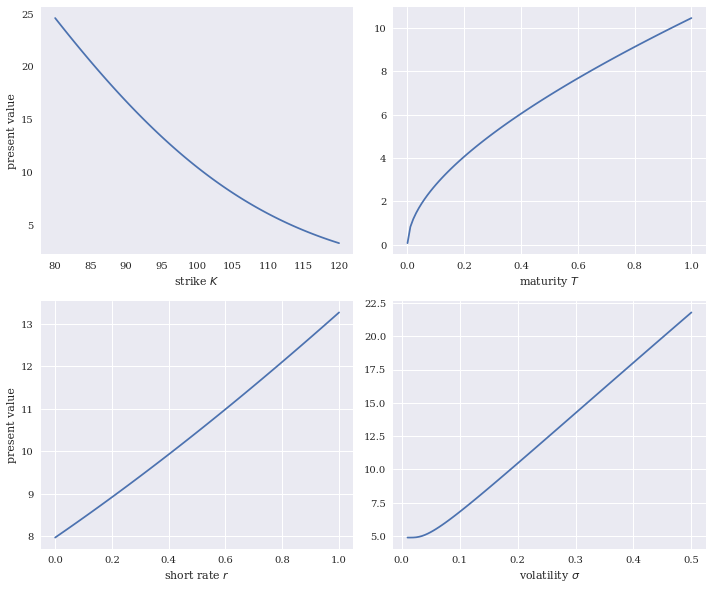

In [84]:
plot_values(BSM_call_value)
plt.savefig('../images/05_com/BSM_call_values.pdf')

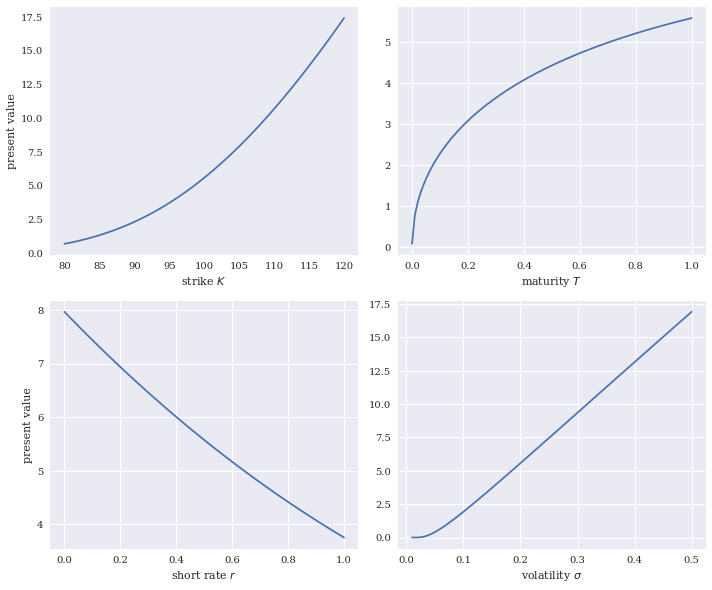

In [85]:
plot_values(BSM_put_value)
plt.savefig('../images/05_com/BSM_put_values.pdf')

### European Call Greeks

In [86]:
%run 05_com/BSM_call_greeks.py

<Figure size 432x288 with 0 Axes>

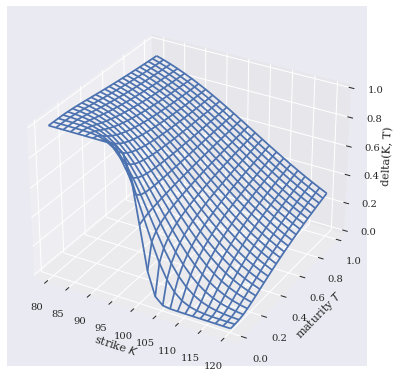

In [87]:
plot_greeks(BSM_delta, 'delta')
plt.savefig('../images/05_com/BSM_delta.pdf')

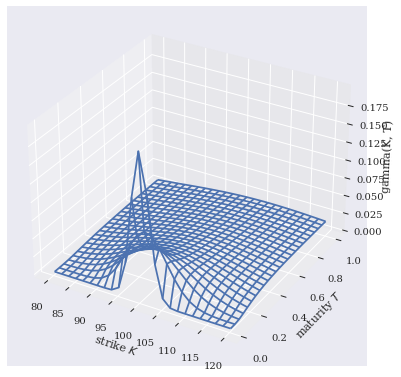

In [88]:
plot_greeks(BSM_gamma, 'gamma')
plt.savefig('../images/05_com/BSM_gamma.pdf')

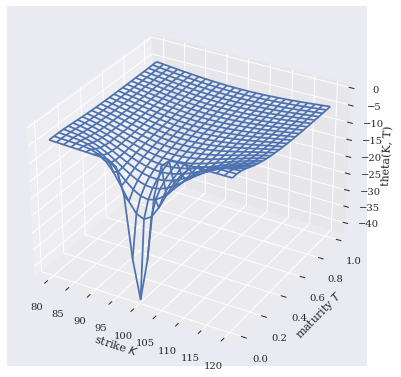

In [89]:
plot_greeks(BSM_theta, 'theta')
plt.savefig('../images/05_com/BSM_theta.pdf')

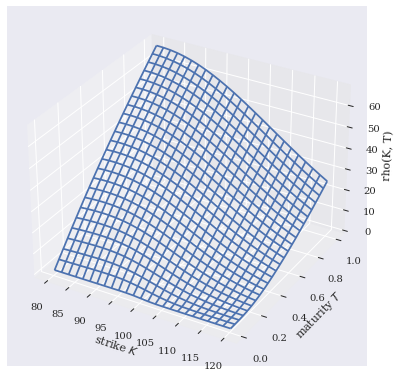

In [90]:
plot_greeks(BSM_rho, 'rho')
plt.savefig('../images/05_com/BSM_rho.pdf')

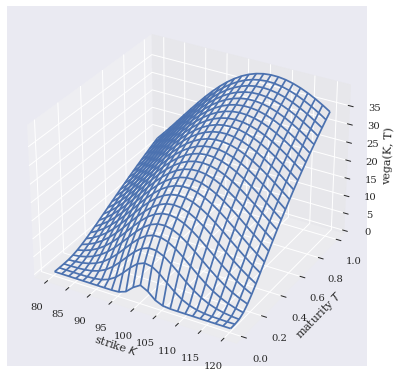

In [91]:
plot_greeks(BSM_vega, 'vega')
plt.savefig('../images/05_com/BSM_vega.pdf')

### Binomial Option Pricing

In [92]:
%run 05_com/CRR_option_valuation.py

<Figure size 432x288 with 0 Axes>

In [93]:
BSM_benchmark = BSM_call_value(S0, K, 0, T, r, sigma)
BSM_benchmark

10.45058357218553

In [94]:
%time CRR_option_value(S0, K, T, r, sigma, 'call', M=2000)

CPU times: user 266 ms, sys: 68.3 ms, total: 335 ms
Wall time: 334 ms


10.449583775457942

CPU times: user 1.02 s, sys: 20 ms, total: 1.04 s
Wall time: 1.04 s


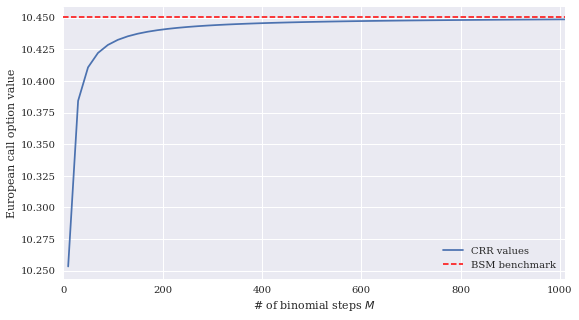

In [95]:
%%time
plot_convergence(10, 1011, 20)
plt.savefig('../images/05_com/CRR_convergence_1.pdf')

CPU times: user 843 ms, sys: 11.8 ms, total: 855 ms
Wall time: 853 ms


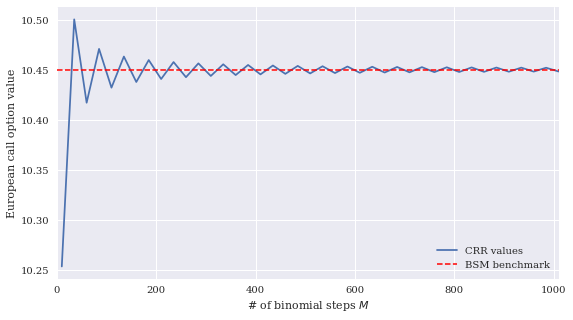

In [96]:
%%time
plot_convergence(10, 1011, 25)
plt.savefig('../images/05_com/CRR_convergence_2.pdf')

## Chapter 6: Fourier-based Option Pricing

### Fourier-based Pricing

In [97]:
%run 06_fou/BSM_option_valuation_FOU.py

<Figure size 432x288 with 0 Axes>

In [98]:
BSM_call_value(S0, K, T, r, sigma)

10.450583572185565

In [99]:
BSM_call_value_INT(S0, K, T, r, sigma)

10.450583572184797

In [100]:
BSM_call_value_FFT(S0, K, T, r, sigma)

10.450583529672013

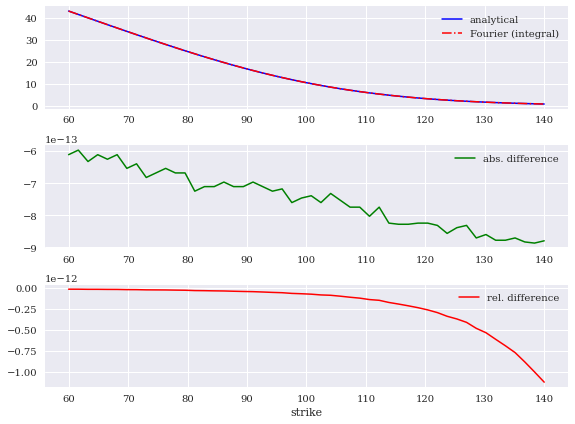

In [101]:
plot_val_differences('int')
plt.savefig('../images/06_fou/BSM_val_accuracy_1.pdf')

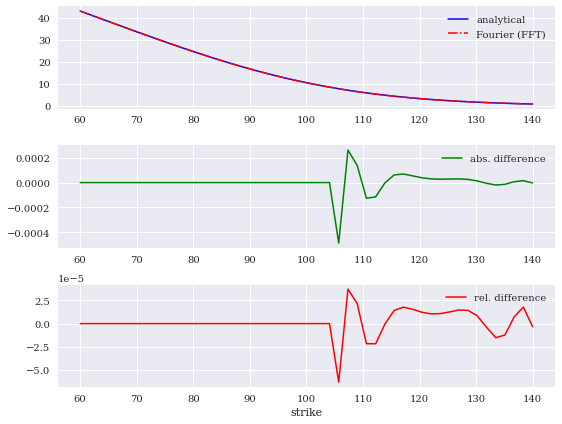

In [102]:
plot_val_differences('fft')
plt.savefig('../images/06_fou/BSM_val_accuracy_2.pdf')

In [103]:
from time import time

In [104]:
t0 = time()
for _ in range(5000):
    BSM_call_value(S0, K, T, r, sigma)
t_ana = time() - t0
print(t_ana)

0.8612442016601562


In [105]:
t0 = time()
for _ in range(5000):
    BSM_call_value_FFT(S0, K, T, r, sigma)
t_fft = time() - t0
print(t_fft)

3.1422858238220215


In [106]:
t0 = time()
for _ in range(5000):
    BSM_call_value_INT(S0, K, T, r, sigma)
t_int = time() - t0
print(t_int)

4.174652576446533


In [107]:
t_fft / t_ana

3.648542211099792

In [108]:
t_int / t_ana

4.847234464277805

In [109]:
t_int / t_fft

1.328540053485276

### Numerical Evaluation

In [110]:
%run 06_fou/Fourier_series.py

<Figure size 432x288 with 0 Axes>

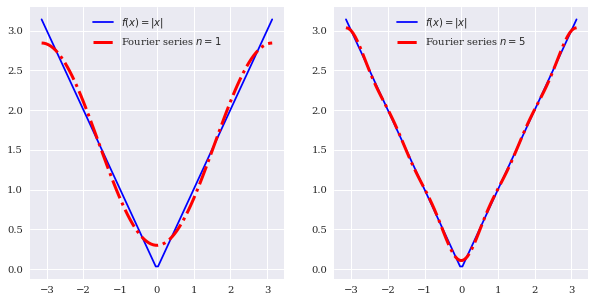

In [111]:
plot_fourier_series()
plt.savefig('../images/06_fou/Fourier_series.pdf')

In [112]:
%run 06_fou/roots_of_unity.py

<Figure size 432x288 with 0 Axes>

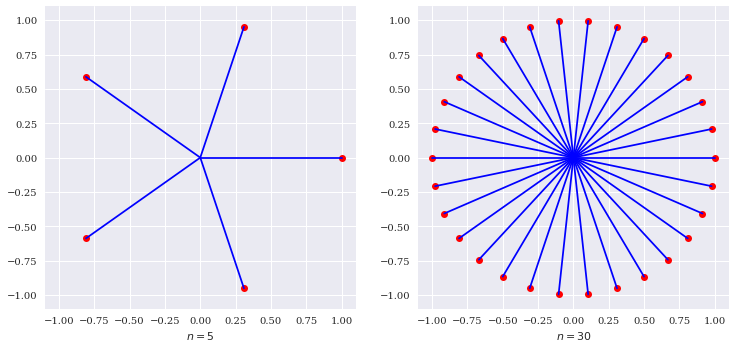

In [113]:
generate_plot()
plt.savefig('../images/06_fou/spokes.pdf')

In [114]:
%run 06_fou/convolution.py

<Figure size 432x288 with 0 Axes>

In [115]:
a = np.arange(10)

In [116]:
revpy(a)

array([0., 9., 8., 7., 6., 5., 4., 3., 2., 1.])

In [117]:
revnp(a)

array([0, 9, 8, 7, 6, 5, 4, 3, 2, 1])

In [118]:
convolution(a, a)

array([165., 200., 225., 240., 245., 240., 225., 200., 165., 120.])

In [119]:
%run 06_fou/call_convolution.py

Value of the Call Option    9.971


In [120]:
%%time
%run 06_fou/call_convolution_general.py

Value of the Call Option   11.044
CPU times: user 2.28 ms, sys: 50 µs, total: 2.33 ms
Wall time: 1.71 ms


In [121]:
dt, df, u, d, q

(0.3333333333333333,
 0.9834714538216175,
 1.1224009024456676,
 0.8909472522884107,
 0.5437765963610321)

In [122]:
S0, K, T, r, sigma

(100.0, 100.0, 1.0, 0.05, 0.2)

In [123]:
S

array([[100.        , 112.24009024, 125.97837858, 141.39824581],
       [ 79.37870064,  89.09472523, 100.        , 112.24009024],
       [ 63.00978115,  70.72223522,  79.37870064,  89.09472523],
       [ 50.01634555,  56.13839138,  63.00978115,  70.72223522]])

In [124]:
V

array([[11.04387109, 17.71388824, 27.6312332 , 41.39824581],
       [ 5.61149283,  3.50065379,  6.54586268, 12.24009024],
       [14.47661814,  8.33413587,  0.        ,  0.        ],
       [19.89038147, 22.33118434, 18.57467646,  0.        ]])

In [125]:
%run 06_fou/call_fft_pricing.py

Value of European option is   11.044
Value of European option is   11.044
Value of European option is   11.044


In [126]:
dt, df, u, d, q

(0.3333333333333333,
 0.9834714538216175,
 1.1224009024456676,
 0.8909472522884107,
 0.5437765963610321)

In [127]:
S0, K, T, r, sigma

(100.0, 100.0, 1.0, 0.05, 0.2)

In [128]:
S

array([[100.        , 112.24009024, 125.97837858, 141.39824581],
       [ 79.37870064,  89.09472523, 100.        , 112.24009024],
       [ 63.00978115,  70.72223522,  79.37870064,  89.09472523],
       [ 50.01634555,  56.13839138,  63.00978115,  70.72223522]])

In [129]:
CT

array([41.39824581, 12.24009024,  0.        ,  0.        ])

In [130]:
%run 06_fou/call_fft_speed.py

In [131]:
%timeit call_fft_value(100)

484 µs ± 18.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [132]:
%timeit call_fft_value(1000)

43.3 ms ± 267 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Chapter 7: American Options

In [133]:
%run 07_amo/CRR_american_options.py

In [134]:
%time CRR_option_valuation(1, 500)

CPU times: user 322 ms, sys: 12 ms, total: 334 ms
Wall time: 334 ms


4.48637477750599

In [135]:
%time CRR_option_valuation(2, 500)

CPU times: user 17.5 ms, sys: 7.88 ms, total: 25.4 ms
Wall time: 24.8 ms


26.9770452038911

In [136]:
%run 07_amo/LSM_primal_valuation.py

American put option value 4.475


In [137]:
# %run 07_amo/LSM_primal_dual_valuation.py
  # runs for about 6 hours (12,800 option valuation primal/dual)

In [138]:
#%run 07_amo/LSM_primal_dual_table.py
  # takes about 15 min

In [139]:
import pandas as pd
h5 = pd.HDFStore('07_amo/results_2014-10-15_table.h5', 'r')
results = h5['results']
h5.close()

In [140]:
results.head()

,AP,AV,AV_se,DUAL,DUAL_se,I1,I2,ITM,J,LSM,LSM_se,M,MM,otype,reg,runs
0,False,4.512025,0.000658,4.625876,0.019462,16384,1024,False,50,4.398175,0.007778,25,True,1,9,25
1,False,4.582679,0.009275,4.697773,0.044691,16384,1024,False,50,4.467584,0.000353,25,True,1,9,25
2,False,4.563877,0.006007,4.623209,0.018725,16384,1024,False,50,4.504544,0.000330,25,True,1,9,25
3,False,4.509957,0.000556,4.637943,0.022974,16384,1024,False,50,4.381970,0.010899,25,True,1,9,25
4,False,4.577622,0.008327,4.717217,0.053290,16384,1024,False,50,4.438026,0.002337,25,True,1,9,25


In [141]:
res = results[(results.otype == 1)  
             # & (results.M == 10)
             & (results.I1 == 16384)
             & (results.I2 == 1024)
             & (results.J == 50)
             & (results.reg == 9)
             & (results.AP == False)
             & (results.MM == True)
             & (results.ITM == False)]

In [142]:
V0_true = 4.48637
def diff(x):
    return np.mean(x) - V0_true

In [143]:
grouped = res.groupby(['otype', 'M', 'I1', 'I2', 'J', 'reg', 'AP', 'MM', 'ITM'])
grouped[['LSM', 'AV', 'DUAL']].agg([max, np.mean, diff, np.median, min]).T

otype               1                    
M                  25        50        75
I1              16384     16384     16384
I2               1024      1024      1024
J                  50        50        50
reg                 9         9         9
AP              False     False     False
MM               True      True      True
ITM             False     False     False
LSM  max     4.526107  4.529452  4.543735
     mean    4.452147  4.470190  4.466950
     diff   -0.034223 -0.016180 -0.019420
     median  4.459270  4.471024  4.474650
     min     4.342221  4.369958  4.390518
AV   max     4.738608  4.603517  4.621614
     mean    4.551757  4.532533  4.532317
     diff    0.065387  0.046163  0.045947
     median  4.546928  4.532072  4.524439
     min     4.485292  4.478896  4.481881
DUAL max     5.017945  4.696514  4.752769
     mean    4.651367  4.594876  4.597683
     diff    0.164997  0.108506  0.111313
     median  4.631951  4.584807  4.574290
     min     4.610128  4.569923  4.552188

In [144]:
# parametrization for M
to_insert = sorted(set(results['M']))
# numerical results
numerics = grouped[['LSM', 'DUAL']].agg([max, np.mean, diff, np.median, min]).values.T
to_insert.extend(numerics.flatten())
# absolute difference between mean primal and dual values
to_insert.extend(np.abs(numerics[1] - numerics[6]))

In [145]:
table_temp = r"""
\def\TMP{\begin{center}\begin{tabular}{p{2cm} p{2cm} x{2cm} x{2cm} x{2cm}} 
\hline\hline
\textbf{Algorithm} & \textbf{Value} & $M=%d$ & $M=%d$ & $M=%d$ \tn [0.5ex]
\hline
LSM & Maximum & %6.3f   & %6.3f & %6.3f  \tn
    & Mean    & %6.3f   & %6.3f  & %6.3f   \tn
    & Difference & %6.3f   & %6.3f  & %6.3f  \tn
    & Median  & %6.3f   & %6.3f  & %6.3f   \tn
    & Minimum & %6.3f   & %6.3f  & %6.3f   \tn
\hline
DUAL & Maximum & %6.3f   & %6.3f & %6.3f  \tn
    & Mean    & %6.3f   & %6.3f  & %6.3f   \tn
    & Difference & %6.3f   & %6.3f  & %6.3f  \tn
    & Median  & %6.3f   & %6.3f  & %6.3f   \tn
    & Minimum & %6.3f   & %6.3f  & %6.3f   \tn [0.5ex] 
\hline
Spread & Absolute  & %6.3f   & %6.3f  & %6.3f  \tn
\hline \hline
\end{tabular}\end{center}}
\newdimen\TMPsize\settowidth{\TMPsize}{\TMP}
"""
table = table_temp % tuple(to_insert)

In [146]:
f = open('07_amo/table_1.tex', 'w')
f.writelines(table)
f.close()

In [147]:
print(table)


\def\TMP{\begin{center}\begin{tabular}{p{2cm} p{2cm} x{2cm} x{2cm} x{2cm}} 
\hline\hline
\textbf{Algorithm} & \textbf{Value} & $M=25$ & $M=50$ & $M=75$ \tn [0.5ex]
\hline
LSM & Maximum &  4.526   &  4.529 &  4.544  \tn
    & Mean    &  4.452   &  4.470  &  4.467   \tn
    & Difference & -0.034   & -0.016  & -0.019  \tn
    & Median  &  4.459   &  4.471  &  4.475   \tn
    & Minimum &  4.342   &  4.370  &  4.391   \tn
\hline
DUAL & Maximum &  5.018   &  4.697 &  4.753  \tn
    & Mean    &  4.651   &  4.595  &  4.598   \tn
    & Difference &  0.165   &  0.109  &  0.111  \tn
    & Median  &  4.632   &  4.585  &  4.574   \tn
    & Minimum &  4.610   &  4.570  &  4.552   \tn [0.5ex] 
\hline
Spread & Absolute  &  0.199   &  0.125  &  0.131  \tn
\hline \hline
\end{tabular}\end{center}}
\newdimen\TMPsize\settowidth{\TMPsize}{\TMP}



In [148]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'

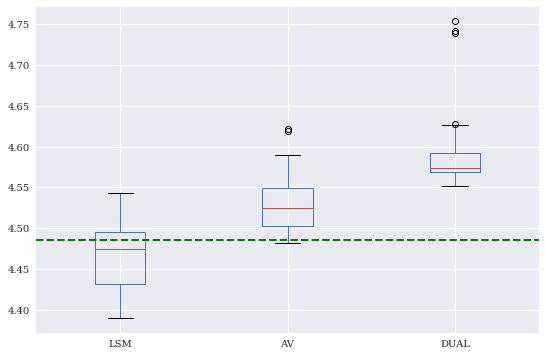

In [149]:
plt.figure(figsize=(9, 6))
res[res.M == 75][['LSM', 'AV', 'DUAL']].boxplot();
plt.axhline(V0_true, color='g', ls='dashed', lw=2.0)
plt.savefig('../images/07_amo/LSM_primal_dual_APO.pdf')

In [150]:
res = results[(results.otype == 2)  
             # & (results.M == 10)
             & (results.I1 == 16384)
             & (results.I2 == 1024)
             & (results.J == 50)
             & (results.reg == 9)
             & (results.AP == False)
             & (results.MM == True)
             & (results.ITM == False)]

In [151]:
V0_true = 26.97705
grouped = res.groupby(['otype', 'M', 'I1', 'I2', 'J', 'reg', 'AP', 'MM', 'ITM'])
grouped[['LSM', 'AV', 'DUAL']].agg([max, np.mean, diff, np.median, min]).T

otype                2                      
M                   25         50         75
I1               16384      16384      16384
I2                1024       1024       1024
J                   50         50         50
reg                  9          9          9
AP               False      False      False
MM                True       True       True
ITM              False      False      False
LSM  max     26.682805  26.709837  27.062636
     mean    25.977307  26.027129  26.308088
     diff    -0.999743  -0.949921  -0.668962
     median  25.945880  25.988614  26.293647
     min     25.180525  25.564437  25.521053
AV   max     29.837145  35.648465  29.464047
     mean    26.931326  27.101877  27.028367
     diff    -0.045724   0.124827   0.051317
     median  26.722923  26.748815  26.963359
     min     26.231485  26.446203  26.574078
DUAL max     33.462468  45.401449  32.415522
     mean    27.885344  28.176625  27.748645
     diff     0.908294   1.199575   0.771595
     median  27.492790  27.478791  27.568544
     min     27.220511  27.230358  27.282115

In [152]:
# parametrization for M
to_insert = sorted(set(results['M']))
# numerical results
numerics = grouped[['LSM', 'DUAL']].agg([max, np.mean, diff, np.median, min]).values.T
to_insert.extend(numerics.flatten())
# absolute difference between mean primal and dual values
to_insert.extend(np.abs(numerics[1] - numerics[6]))

In [153]:
table = table_temp % tuple(to_insert)

In [154]:
f = open('07_amo/table_2.tex', 'w')
f.writelines(table)
f.close()

In [155]:
print(table)


\def\TMP{\begin{center}\begin{tabular}{p{2cm} p{2cm} x{2cm} x{2cm} x{2cm}} 
\hline\hline
\textbf{Algorithm} & \textbf{Value} & $M=25$ & $M=50$ & $M=75$ \tn [0.5ex]
\hline
LSM & Maximum & 26.683   & 26.710 & 27.063  \tn
    & Mean    & 25.977   & 26.027  & 26.308   \tn
    & Difference & -1.000   & -0.950  & -0.669  \tn
    & Median  & 25.946   & 25.989  & 26.294   \tn
    & Minimum & 25.181   & 25.564  & 25.521   \tn
\hline
DUAL & Maximum & 33.462   & 45.401 & 32.416  \tn
    & Mean    & 27.885   & 28.177  & 27.749   \tn
    & Difference &  0.908   &  1.200  &  0.772  \tn
    & Median  & 27.493   & 27.479  & 27.569   \tn
    & Minimum & 27.221   & 27.230  & 27.282   \tn [0.5ex] 
\hline
Spread & Absolute  &  1.908   &  2.149  &  1.441  \tn
\hline \hline
\end{tabular}\end{center}}
\newdimen\TMPsize\settowidth{\TMPsize}{\TMP}



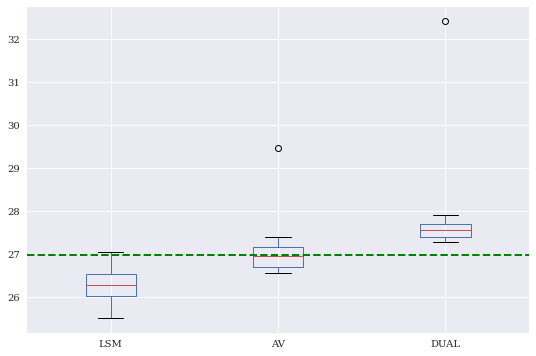

In [156]:
V0_true = 26.97705
plt.figure(figsize=(9, 6))
res[res.M == 75][['LSM', 'AV', 'DUAL']].boxplot();
plt.axhline(V0_true, color='g', ls='dashed', lw=2.0)
plt.savefig('../images/07_amo/LSM_primal_dual_SCS.pdf')